In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Production Data

In [2]:
# Reference: https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736177056&menu=resultados&idp=1254735576581
#prod_url = 'https://www.ine.es/jaxiT3/files/t/en/csv_bd/32449.csv?nocab=1'
prod_url = '32449.csv'
P = pd.read_csv(prod_url, sep='\t', on_bad_lines='skip')
P_t = P[P['Periodo'] == 2019]
P_t = P_t[P_t['Macroeconomic aggregates'].str.contains('Production')]
P_t = P_t[~P_t['NACE Group A64'].isna()][['NACE Group A64', 'Total']]
P_t.columns = ['sector', 'total_mi']
P_t['sector_code'] = P_t['sector'].str.split(' ').str[0]
P_t['total_mi'] = P_t['total_mi'].astype(float)
P_t

,sector,total_mi,sector_code
87,"01 Crop and animal production, hunting and rel...",53.857,01
115,02 Forestry and logging,1.741,02
143,03 Fishing and aquaculture,2.639,03
227,05-09 Mining and quarrying,5.855,05-09
283,"35 Electricity, gas, steam and air conditionin...",64.970,35
...,...,...,...
2551,94 Activities of membership organisations,16.910,94
2579,95 Repair of computers and personal and househ...,2.484,95
2607,96 Other personal service activities,13.010,96
2663,97-98 Activities of households as employers; u...,9.819,97-98


## Eission Data

In [3]:
#Reference: #https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176941&menu=resultados&idp=1254735976603
#E_url = 'https://www.ine.es/jaxi/files/_px/en/csv_bdsc/t26/p084/base_2010/serie/l1/01005.csv_bdsc?nocab=1'
E_url = '01005.csv'
E = pd.read_csv(E_url, sep=';')
E_t = E[E['period'] == '2019']
E_t = E_t[E_t['Environmental issues'].str.contains('Greenhouse Gas')].iloc[:63]
E_t = E_t[['Branch of activity (CNAE 2009)', 'Total']]
E_t.columns = ['sector', 'total_Gg']
E_t['sector_code'] = E_t['sector'].str.split(': ').str[0]
E_t['total_Gg'] = E_t['total_Gg'].str.replace(',', '').astype(float) / 1000
E_t

,sector,total_Gg,sector_code
2,"01: Crop and animal production, hunting and re...",48.0137,01
16,02: Forestry and logging,0.1502,02
30,03: Fishing and aquaculture,1.7841,03
44,05-09: Mining and quarrying,2.0746,05-09
58,"10-12: Manufacture of food products, beverages...",6.2854,10-12
...,...,...,...
814,93: Sports activities and amusement and recrea...,0.3256,93
828,94: Activities of membership organisations,1.1438,94
842,95: Repair of computers and personal and house...,0.0128,95
856,96: Other personal service activities,0.3044,96


## Dictionary Data

In [4]:
# Refecence: https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736177058&menu=resultados&idp=1254735576581
#dict_url = 'https://www.ine.es/en/daco/daco42/cne15/cne_tio_16_en.xlsx'
dict_url = 'cne_tio_16_en.xlsx'
dict_ = pd.read_excel(dict_url, sheet_name='Table4', engine='openpyxl')
dict_.columns = ['col1','pucts','IOT_sector','CPA 2008','col5','Industries','col7','NACE rev. 2']
dict_ = dict_[['pucts','IOT_sector','CPA 2008','Industries','NACE rev. 2']]
dict_ = dict_.loc[7:71,:]
dict_['sector_code'] = ['01', '02', '03', '05-09', '10-12', '13-15', '16',
                                  '17', '18', '19', '20', '21', '22', '23', '24',
                                  '25', '26', '27', '28','29', '30', '31-32',
                                  '33', '35', '36', '37-39', '41-43', '45', '46',
                                  '47', '49', '50', '51', '52', '53', '55-56',
                                  '58', '59-60', '61', '62-63', '64', '65', '66',
                                  '68', '-','69-70', '71', '72', '73', '74-75', '77',
                                  '78', '79', '80-82', '84', '85', '86', '87-88',
                                  '90-92', '93', '94', '95', '96', '97-98', '99']
dict_

,pucts,IOT_sector,CPA 2008,Industries,NACE rev. 2,sector_code
7,"Products of agriculture, hunting and related s...",1,01,"Crop and animal production, hunting and relate...",01,01
8,"Products of forestry, logging and related serv...",2,02,Forestry and logging,02,02
9,Fish and other fishing products; aquaculture p...,3,03,Fishing and aquaculture,03,03
10,Mining and quarrying,4,05–09,Mining and quarrying,05–09,05-09
11,Food products; beverages; tobacco products,5,10-12,"Manufacture of food products, beverages and to...",10-12,10-12
...,...,...,...,...,...,...
67,Services furnished by membership organisations,60,94,Activities of membership organisations,94,94
68,Repair services of computers and personal and ...,61,95,Repair of computers and personal and household...,95,95
69,Other personal services,62,96,Other personal service activities,96,96
70,Services of households as employers; undiffere...,63,97-98,Activities of households as employers; undiffe...,97-98,97-98


## Inverse Lentief matrix Data


In [7]:
# Refecence: https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736177058&menu=resultados&idp=1254735576581
L = pd.read_excel(dict_url, sheet_name='Table3', engine='openpyxl')
L.columns = L.loc[6,:]
L.index = L.iloc[:,1]
L['IOT_sector'] = L.index.str.split('\. ').str.get(0)
L = L.iloc[8:,2:]
L['IOT_sector'] = pd.to_numeric(L['IOT_sector'], errors='coerce').fillna(1000).astype(int)
L = L.merge(dict_[['IOT_sector','sector_code']], left_on='IOT_sector', right_on='IOT_sector',how='left') #inner
L.shape #the first 65 columns are sectors and the last two columns are sectors codes

(65, 67)

## Eission Coefficient Calculation

In [10]:
# Refecence: https://repositorio.bde.es/bitstream/123456789/29610/4/do2220e.pdf
# AN ESTIMATION OF THE CARBON FOOTPRINT IN SPANISH CREDIT INSTITUTIONS’ BUSI-
# NESS LENDING PORTFOLIO
coef = E_t.merge(P_t, on='sector_code', how='outer')
coef['coef_direct'] = coef['total_Gg'] / coef['total_mi']
coef = L.merge(coef, on='sector_code', how='left')
L_ = coef.iloc[:, :65].values
coef_direct_ = coef['coef_direct'].fillna(0).values
coef['coef_total'] = np.dot(L_, coef_direct_)
coef['coef_indirect'] = coef['coef_total'] - coef['coef_direct']
coef_ = coef[['sector_y','total_Gg','total_mi','coef_direct','coef_indirect','coef_total']]
coef_.to_csv('results.csv', index=False) 
coef_

,sector_y,total_Gg,total_mi,coef_direct,coef_indirect,coef_total
0,"01 Crop and animal production, hunting and rel...",48.0137,53.857,0.891503,0.14978,1.041283
1,02 Forestry and logging,0.1502,1.741,0.086272,0.085914,0.172186
2,03 Fishing and aquaculture,1.7841,2.639,0.676052,0.012071,0.688122
3,05-09 Mining and quarrying,2.0746,5.855,0.354330,1.012192,1.366522
4,"10-12 Manufacture of food products, beverages ...",6.2854,125.432,0.050110,0.366062,0.416172
...,...,...,...,...,...,...
60,94 Activities of membership organisations,1.1438,16.910,0.067640,0.068945,0.136585
61,95 Repair of computers and personal and househ...,0.0128,2.484,0.005153,0.022813,0.027966
62,96 Other personal service activities,0.3044,13.010,0.023397,0.020102,0.043499
63,97-98 Activities of households as employers; u...,0.0002,9.819,0.000020,-0.00002,0.0


## Plot coefficients

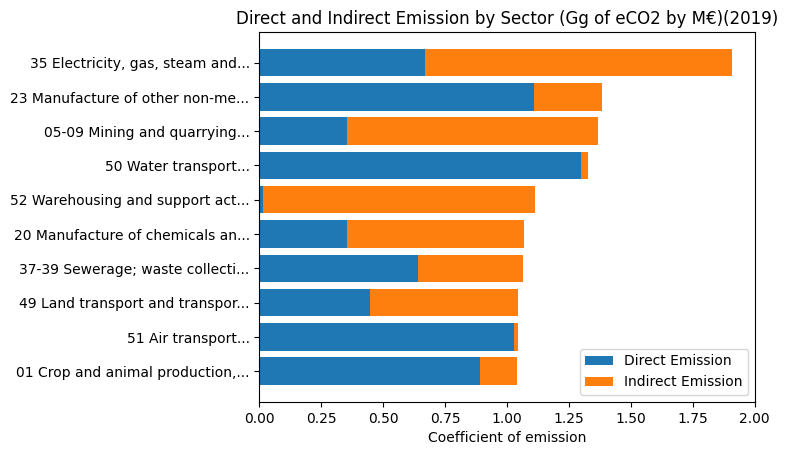

In [11]:
#Plot just the 10 most poluters
coef_ = coef_.sort_values('coef_total', ascending=True)
coef_10 = coef_.iloc[55:,:].copy()

#reduce index size
#coef_10.sector_y = coef_10.sector_y.str.split('\n').str[1]
coef_10['sector'] = [name[:30] + '...' for name in coef_10.sector_y]

# create the bar chart
plt.barh(coef_10.sector, coef_10['coef_direct'], label='Direct Emission')
plt.barh(coef_10.sector, coef_10['coef_indirect'], left=coef_10['coef_direct'], label='Indirect Emission')

# set the chart title and axis labels
plt.title('Direct and Indirect Emission by Sector (Gg of eCO2 by M€)(2019)')
plt.xlabel('Coefficient of emission')

# display the legend
plt.legend()

# show the chart
plt.show()